In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib notebook

In [3]:
import platform
import matplotlib.font_manager as fm

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

In [4]:
import sys
print(sys.stdin.encoding)
print(sys.stdout.encoding)

utf-8
UTF-8


In [54]:
df_hanriver =pd.read_csv("./df_hanriver.csv" ,parse_dates=[0])
df_hanriver

,대여일자,년,월,일,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,2019,12,1,0,2219,"고속터미널역 8-1번, 8-2번 출구 사이",정기권,~10대,1,200.34,1.73,7440.00,47
1,2019-12-01,2019,12,1,0,1268,몽촌토성역 1번출구 옆,정기권,20대,1,39.47,0.41,1780.00,16
2,2019-12-01,2019,12,1,0,1009,천호역4번출구(현대백화점),정기권,20대,2,347.37,2.39,10320.00,61
3,2019-12-01,2019,12,1,0,204,국회의사당역 5번출구 옆,정기권,20대,1,110.42,1.00,4290.00,19
4,2019-12-01,2019,12,1,0,207,여의나루역 1번출구 앞,정기권,20대,1,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505227,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,~10대,1,0.00,0.00,0.00,43
505228,2021-01-31,2021,1,31,23,152,마포구민체육센터 앞,일일권,20대,1,114.94,1.50,6450.00,43
505229,2021-01-31,2021,1,31,23,4619,한강트럼프월드3차 앞,일일권,20대,2,282.84,4.11,17707.58,138
505230,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,30대,1,250.30,1.61,6945.89,38


In [79]:
a= df_hanriver['대여일자'].unique().tolist()
len(a)

427

In [6]:
df_info = pd.read_csv("./data/공공자전거 대여소 정보.csv",encoding='cp949')
df_info

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,NaN,10,QR
2157,1090.0,상일동역 2번출구 앞,강동구,고덕로 333,37.556789,127.166145,2020-01-13,NaN,10,QR
2158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_info.columns=['대여소번호','대여소명','위치','상세주소','위도','경도','설치시기','거치대수(LCD)','거치대수(QR)','운영방식']
df_info

,대여소번호,대여소명,위치,상세주소,위도,경도,설치시기,거치대수(LCD),거치대수(QR),운영방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,NaN,10,QR
2157,1090.0,상일동역 2번출구 앞,강동구,고덕로 333,37.556789,127.166145,2020-01-13,NaN,10,QR
2158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_info2 = df_info[['대여소번호','대여소명','거치대수(LCD)','거치대수(QR)']]
df_info2

,대여소번호,대여소명,거치대수(LCD),거치대수(QR)
0,NaN,NaN,LCD,QR
1,NaN,NaN,NaN,NaN
2,NaN,NaN,거치\n대수,거치\n대수
3,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,16,NaN
...,...,...,...,...
2156,1089.0,고덕 래미안힐스테이트(201동),NaN,10
2157,1090.0,상일동역 2번출구 앞,NaN,10
2158,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN


In [9]:
total= df_info2.drop(index=[0,1,2,3,2158,2159,2160],axis=0)
total

,대여소번호,대여소명,거치대수(LCD),거치대수(QR)
4,301.0,경복궁역 7번출구 앞,16,NaN
5,302.0,경복궁역 4번출구 뒤,12,NaN
6,303.0,광화문역 1번출구 앞,8,NaN
7,304.0,광화문역 2번출구 앞,NaN,7
8,305.0,종로구청 옆,16,NaN
...,...,...,...,...
2153,1085.0,래미안 솔베뉴(고덕로),NaN,20
2154,1086.0,래미안 솔베뉴(구천면로),NaN,10
2155,1088.0,풍납사거리(강동),NaN,12
2156,1089.0,고덕 래미안힐스테이트(201동),NaN,10


In [10]:
total.reset_index(drop=True,inplace=True)
total

,대여소번호,대여소명,거치대수(LCD),거치대수(QR)
0,301.0,경복궁역 7번출구 앞,16,NaN
1,302.0,경복궁역 4번출구 뒤,12,NaN
2,303.0,광화문역 1번출구 앞,8,NaN
3,304.0,광화문역 2번출구 앞,NaN,7
4,305.0,종로구청 옆,16,NaN
...,...,...,...,...
2149,1085.0,래미안 솔베뉴(고덕로),NaN,20
2150,1086.0,래미안 솔베뉴(구천면로),NaN,10
2151,1088.0,풍납사거리(강동),NaN,12
2152,1089.0,고덕 래미안힐스테이트(201동),NaN,10


In [11]:
total = total.fillna(0)
total

,대여소번호,대여소명,거치대수(LCD),거치대수(QR)
0,301.0,경복궁역 7번출구 앞,16,0
1,302.0,경복궁역 4번출구 뒤,12,0
2,303.0,광화문역 1번출구 앞,8,0
3,304.0,광화문역 2번출구 앞,0,7
4,305.0,종로구청 옆,16,0
...,...,...,...,...
2149,1085.0,래미안 솔베뉴(고덕로),0,20
2150,1086.0,래미안 솔베뉴(구천면로),0,10
2151,1088.0,풍납사거리(강동),0,12
2152,1089.0,고덕 래미안힐스테이트(201동),0,10


In [12]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2154 non-null   float64
 1   대여소명       2154 non-null   object 
 2   거치대수(LCD)  2154 non-null   object 
 3   거치대수(QR)   2154 non-null   object 
dtypes: float64(1), object(3)
memory usage: 67.4+ KB


In [13]:
total = total.astype({'거치대수(LCD)': 'int','거치대수(QR)':'int','대여소번호':'int'})
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대여소번호      2154 non-null   int64 
 1   대여소명       2154 non-null   object
 2   거치대수(LCD)  2154 non-null   int64 
 3   거치대수(QR)   2154 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 67.4+ KB


In [14]:
total['총거치대수'] = total['거치대수(LCD)'] + total['거치대수(QR)']
total

,대여소번호,대여소명,거치대수(LCD),거치대수(QR),총거치대수
0,301,경복궁역 7번출구 앞,16,0,16
1,302,경복궁역 4번출구 뒤,12,0,12
2,303,광화문역 1번출구 앞,8,0,8
3,304,광화문역 2번출구 앞,0,7,7
4,305,종로구청 옆,16,0,16
...,...,...,...,...,...
2149,1085,래미안 솔베뉴(고덕로),0,20,20
2150,1086,래미안 솔베뉴(구천면로),0,10,10
2151,1088,풍납사거리(강동),0,12,12
2152,1089,고덕 래미안힐스테이트(201동),0,10,10


In [15]:
total.to_csv('대여소정보.csv', index=False)

In [16]:
df_place_month = df_hanriver.groupby(['대여소명','대여소번호'],as_index=False).sum().sort_values(by='이용건수',ascending=False)
df_place_month.reset_index(drop=True,inplace=True)
df_place_month

,대여소명,대여소번호,년,월,일,대여시간,이용건수,이동거리,사용시간
0,뚝섬유원지역 1번출구 앞,502,114544240,382242,910465,841254,137466,5.903380e+08,6505079
1,여의나루역 1번출구 앞,207,106933010,353194,845175,768524,127847,6.269426e+08,6738493
2,마포구민체육센터 앞,152,95429125,321647,758575,697353,87636,3.601636e+08,4204979
3,"고속터미널역 8-1번, 8-2번 출구 사이",2219,78672680,255708,622037,597703,68645,3.490173e+08,3634134
4,노들역 1번출구,2002,61603852,197350,483163,442863,46488,2.203209e+08,2228300
5,천호역4번출구(현대백화점),1009,64067892,216690,506118,454458,44617,1.403422e+08,1313051
6,선유도역 3번출구 앞,228,61911083,211527,491282,450777,42546,9.706523e+07,1524838
7,몽촌토성역 1번출구 옆,1268,54269407,182935,425216,401052,38547,1.323586e+08,1489050
8,아크로리버뷰 부지 앞,2217,45985339,156429,363289,338457,33064,1.639238e+08,1760112
9,여의도역 4번출구 옆,211,50386559,173600,396087,353339,32913,1.005512e+08,980937


In [17]:
df_new =df_place_month.loc[:,['대여소명','대여소번호','이용건수']]
df_new

,대여소명,대여소번호,이용건수
0,뚝섬유원지역 1번출구 앞,502,137466
1,여의나루역 1번출구 앞,207,127847
2,마포구민체육센터 앞,152,87636
3,"고속터미널역 8-1번, 8-2번 출구 사이",2219,68645
4,노들역 1번출구,2002,46488
5,천호역4번출구(현대백화점),1009,44617
6,선유도역 3번출구 앞,228,42546
7,몽촌토성역 1번출구 옆,1268,38547
8,아크로리버뷰 부지 앞,2217,33064
9,여의도역 4번출구 옆,211,32913


In [18]:
df_total = pd.read_csv('대여소정보.csv')
df_total

,대여소번호,대여소명,거치대수(LCD),거치대수(QR),총거치대수
0,301,경복궁역 7번출구 앞,16,0,16
1,302,경복궁역 4번출구 뒤,12,0,12
2,303,광화문역 1번출구 앞,8,0,8
3,304,광화문역 2번출구 앞,0,7,7
4,305,종로구청 옆,16,0,16
...,...,...,...,...,...
2149,1085,래미안 솔베뉴(고덕로),0,20,20
2150,1086,래미안 솔베뉴(구천면로),0,10,10
2151,1088,풍납사거리(강동),0,12,12
2152,1089,고덕 래미안힐스테이트(201동),0,10,10


In [19]:
df_hanriver_b = df_total[df_total['대여소명'].str.contains('뚝섬유원지역 1번출구 앞|여의나루역 1번출구 앞|마포구민체육센터 앞|고속터미널역 8-1번, 8-2번 출구 사이|노들역 1번출구|천호역4번출구(현대백화점)|선유도역 3번출구 앞|몽촌토성역 1번출구 옆|아크로리버뷰 부지 앞|여의도역 4번출구 옆|망원2빗물펌프장 앞|천호역 10번 출구 앞|여의도역 1번출구 옆|국회의사당역 3번출구 옆|고속터미널역 5번출구 앞|노들섬 서측 앞|신반포역 2번출구 앞|국회의사당역 5번출구 옆|하늘공원 입구|노들역 3번출구|노들섬 동측 앞|신반포역 3번출구 뒤|노들섬 다목적홀(동쪽) 숲, 앞|한강트럼프월드3차 앞')]
df_hanriver_b['대여소명'].unique()

array(['노들섬 동측 앞', '노들섬 서측 앞', '뚝섬유원지역 1번출구 앞', '마포구민체육센터 앞',
       '망원2빗물펌프장 앞', '하늘공원 입구', '국회의사당역 3번출구 옆', '국회의사당역 5번출구 옆',
       '여의나루역 1번출구 앞', '여의도역 4번출구 옆', '여의도역 1번출구 옆', '선유도역 3번출구 앞',
       '노들역 1번출구', '노들역 3번출구', '고속터미널역 5번출구 앞', '신반포역 2번출구 앞',
       '아크로리버뷰 부지 앞', '고속터미널역 8-1번, 8-2번 출구 사이', '신반포역 3번출구 뒤',
       '천호역 10번 출구 앞', '몽촌토성역 1번출구 옆'], dtype=object)

In [20]:
len(df_hanriver_b['대여소명'])

21

In [21]:
bic_21 = df_hanriver_b['대여소명'].unique()
bic_21

array(['노들섬 동측 앞', '노들섬 서측 앞', '뚝섬유원지역 1번출구 앞', '마포구민체육센터 앞',
       '망원2빗물펌프장 앞', '하늘공원 입구', '국회의사당역 3번출구 옆', '국회의사당역 5번출구 옆',
       '여의나루역 1번출구 앞', '여의도역 4번출구 옆', '여의도역 1번출구 옆', '선유도역 3번출구 앞',
       '노들역 1번출구', '노들역 3번출구', '고속터미널역 5번출구 앞', '신반포역 2번출구 앞',
       '아크로리버뷰 부지 앞', '고속터미널역 8-1번, 8-2번 출구 사이', '신반포역 3번출구 뒤',
       '천호역 10번 출구 앞', '몽촌토성역 1번출구 옆'], dtype=object)

In [22]:
arr =['뚝섬유원지역 1번출구 앞','여의나루역 1번출구 앞','마포구민체육센터 앞','고속터미널역 8-1번, 8-2번 출구 사이','노들역 1번출구','천호역4번출구(현대백화점)','선유도역 3번출구 앞','몽촌토성역 1번출구 옆','아크로리버뷰 부지 앞','여의도역 4번출구 옆','망원2빗물펌프장 앞','천호역 10번 출구 앞','여의도역 1번출구 옆','국회의사당역 3번출구 옆','고속터미널역 5번출구 앞','노들섬 서측 앞','신반포역 2번출구 앞','국회의사당역 5번출구 옆','하늘공원 입구','노들역 3번출구','노들섬 동측 앞','신반포역 3번출구 뒤','노들섬 다목적홀(동쪽) 숲, 앞','한강트럼프월드3차 앞']
len(arr)

24

In [23]:
no =[]
for i in arr:
    if i not in bic_21:
        no.append(i)
no

['천호역4번출구(현대백화점)', '노들섬 다목적홀(동쪽) 숲, 앞', '한강트럼프월드3차 앞']

In [24]:
df_hanriver_b.reset_index(drop=True,inplace=True)
df_hanriver_b
df_hanriver_b_info = df_hanriver_b.loc[:,['대여소명','총거치대수']]
df_hanriver_b_info['대여소명']= df_hanriver_b_info['대여소명'].str.replace(' ','')
df_hanriver_b_info

,대여소명,총거치대수
0,노들섬동측앞,10
1,노들섬서측앞,10
2,뚝섬유원지역1번출구앞,27
3,마포구민체육센터앞,30
4,망원2빗물펌프장앞,10
5,하늘공원입구,15
6,국회의사당역3번출구옆,15
7,국회의사당역5번출구옆,13
8,여의나루역1번출구앞,40
9,여의도역4번출구옆,13


In [25]:
df_hanriver_bic=df_new.drop([5,22,23],axis=0)
df_hanriver_bic.reset_index(drop=True,inplace=True)
df_hanriver_bic

,대여소명,대여소번호,이용건수
0,뚝섬유원지역 1번출구 앞,502,137466
1,여의나루역 1번출구 앞,207,127847
2,마포구민체육센터 앞,152,87636
3,"고속터미널역 8-1번, 8-2번 출구 사이",2219,68645
4,노들역 1번출구,2002,46488
5,선유도역 3번출구 앞,228,42546
6,몽촌토성역 1번출구 옆,1268,38547
7,아크로리버뷰 부지 앞,2217,33064
8,여의도역 4번출구 옆,211,32913
9,망원2빗물펌프장 앞,182,30726


In [27]:
df_hanriver_bic['대여소명']= df_hanriver_bic['대여소명'].str.replace(' ','')
df_hanriver_bic

,대여소명,대여소번호,이용건수
0,뚝섬유원지역1번출구앞,502,137466
1,여의나루역1번출구앞,207,127847
2,마포구민체육센터앞,152,87636
3,"고속터미널역8-1번,8-2번출구사이",2219,68645
4,노들역1번출구,2002,46488
5,선유도역3번출구앞,228,42546
6,몽촌토성역1번출구옆,1268,38547
7,아크로리버뷰부지앞,2217,33064
8,여의도역4번출구옆,211,32913
9,망원2빗물펌프장앞,182,30726


In [28]:
df_hanriver_sum=df_hanriver_bic.loc[:,['대여소명','이용건수']]
df_hanriver_sum

,대여소명,이용건수
0,뚝섬유원지역1번출구앞,137466
1,여의나루역1번출구앞,127847
2,마포구민체육센터앞,87636
3,"고속터미널역8-1번,8-2번출구사이",68645
4,노들역1번출구,46488
5,선유도역3번출구앞,42546
6,몽촌토성역1번출구옆,38547
7,아크로리버뷰부지앞,33064
8,여의도역4번출구옆,32913
9,망원2빗물펌프장앞,30726


In [29]:
df_hanriver_sum['대여소명'].unique()

array(['뚝섬유원지역1번출구앞', '여의나루역1번출구앞', '마포구민체육센터앞', '고속터미널역8-1번,8-2번출구사이',
       '노들역1번출구', '선유도역3번출구앞', '몽촌토성역1번출구옆', '아크로리버뷰부지앞', '여의도역4번출구옆',
       '망원2빗물펌프장앞', '천호역10번출구앞', '여의도역1번출구옆', '국회의사당역3번출구옆',
       '고속터미널역5번출구앞', '노들섬서측앞', '신반포역2번출구앞', '국회의사당역5번출구옆', '하늘공원입구',
       '노들역3번출구', '노들섬동측앞', '신반포역3번출구뒤'], dtype=object)

In [90]:
bic_merge = pd.merge(df_hanriver_sum,df_hanriver_b_info,left_on='대여소명',right_on='대여소명',how='outer')
bic_merge

,대여소명,이용건수,총거치대수
0,뚝섬유원지역1번출구앞,137466,27
1,여의나루역1번출구앞,127847,40
2,마포구민체육센터앞,87636,30
3,"고속터미널역8-1번,8-2번출구사이",68645,20
4,노들역1번출구,46488,18
5,선유도역3번출구앞,42546,10
6,몽촌토성역1번출구옆,38547,15
7,아크로리버뷰부지앞,33064,20
8,여의도역4번출구옆,32913,13
9,망원2빗물펌프장앞,30726,10


In [91]:
bic_merge['이용건수']=bic_merge['이용건수']/427
bic_merge

,대여소명,이용건수,총거치대수
0,뚝섬유원지역1번출구앞,321.934426,27
1,여의나루역1번출구앞,299.407494,40
2,마포구민체육센터앞,205.236534,30
3,"고속터미널역8-1번,8-2번출구사이",160.761124,20
4,노들역1번출구,108.871194,18
5,선유도역3번출구앞,99.639344,10
6,몽촌토성역1번출구옆,90.274005,15
7,아크로리버뷰부지앞,77.433255,20
8,여의도역4번출구옆,77.079625,13
9,망원2빗물펌프장앞,71.957845,10


In [92]:
bic_merge['이용건수'].mean()

88.8466599754656

In [87]:
bic_merge.corr()

,이용건수,총거치대수
이용건수,1.000000,0.689049
총거치대수,0.689049,1.000000


In [88]:
bic_merge['이용건수']=bic_merge['이용건수']/24
bic_merge

,대여소명,이용건수,총거치대수
0,뚝섬유원지역1번출구앞,13.413934,27
1,여의나루역1번출구앞,12.475312,40
2,마포구민체육센터앞,8.551522,30
3,"고속터미널역8-1번,8-2번출구사이",6.698380,20
4,노들역1번출구,4.536300,18
5,선유도역3번출구앞,4.151639,10
6,몽촌토성역1번출구옆,3.761417,15
7,아크로리버뷰부지앞,3.226386,20
8,여의도역4번출구옆,3.211651,13
9,망원2빗물펌프장앞,2.998244,10


In [113]:
bic_merge['총거치대수'].mean()

17.571428571428573

<IPython.core.display.Javascript object>


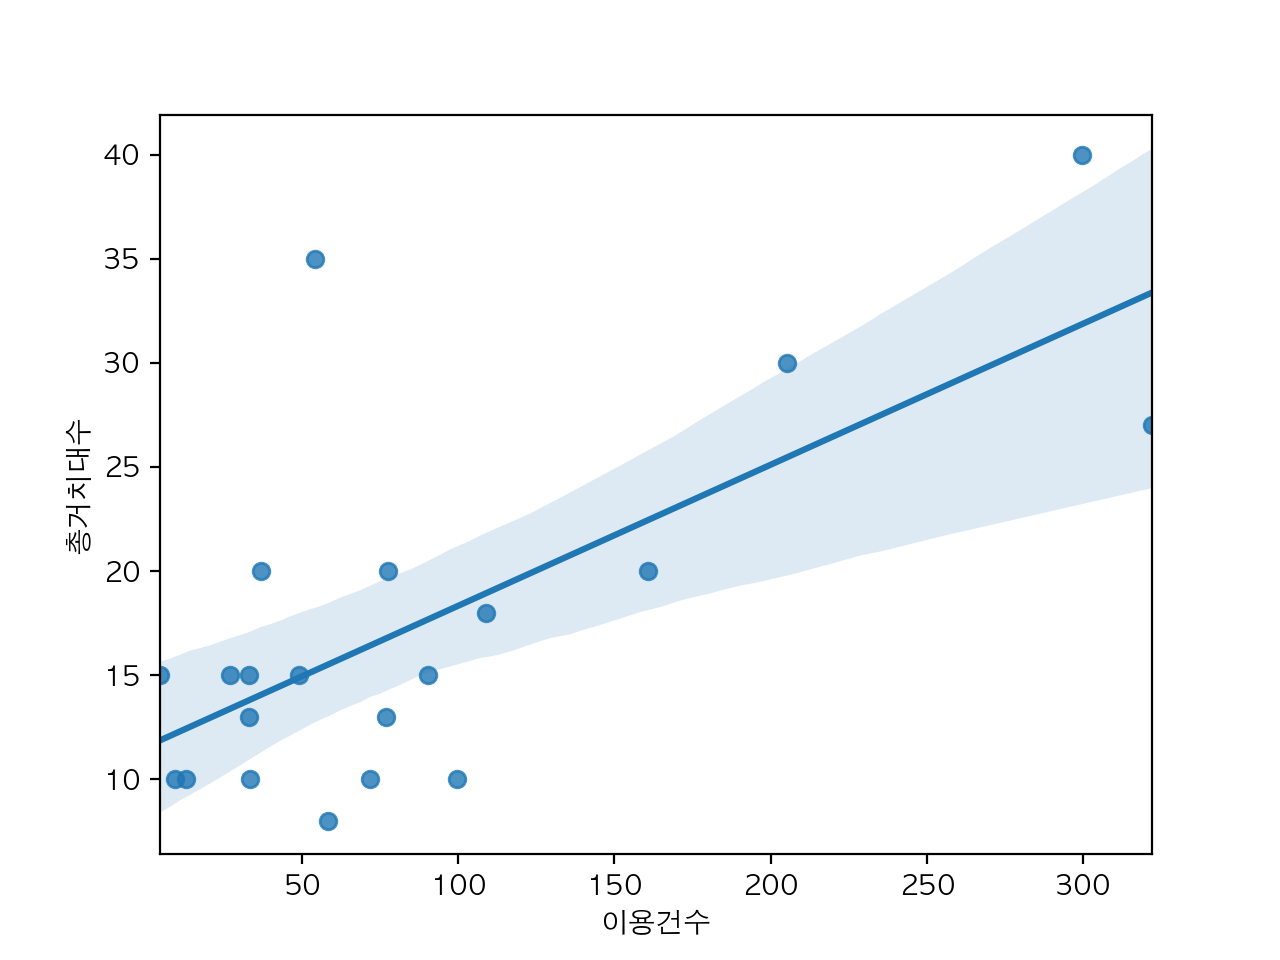

<AxesSubplot:xlabel='이용건수', ylabel='총거치대수'>

In [84]:
sns.regplot(x='이용건수',y='총거치대수',data=bic_merge)

<IPython.core.display.Javascript object>


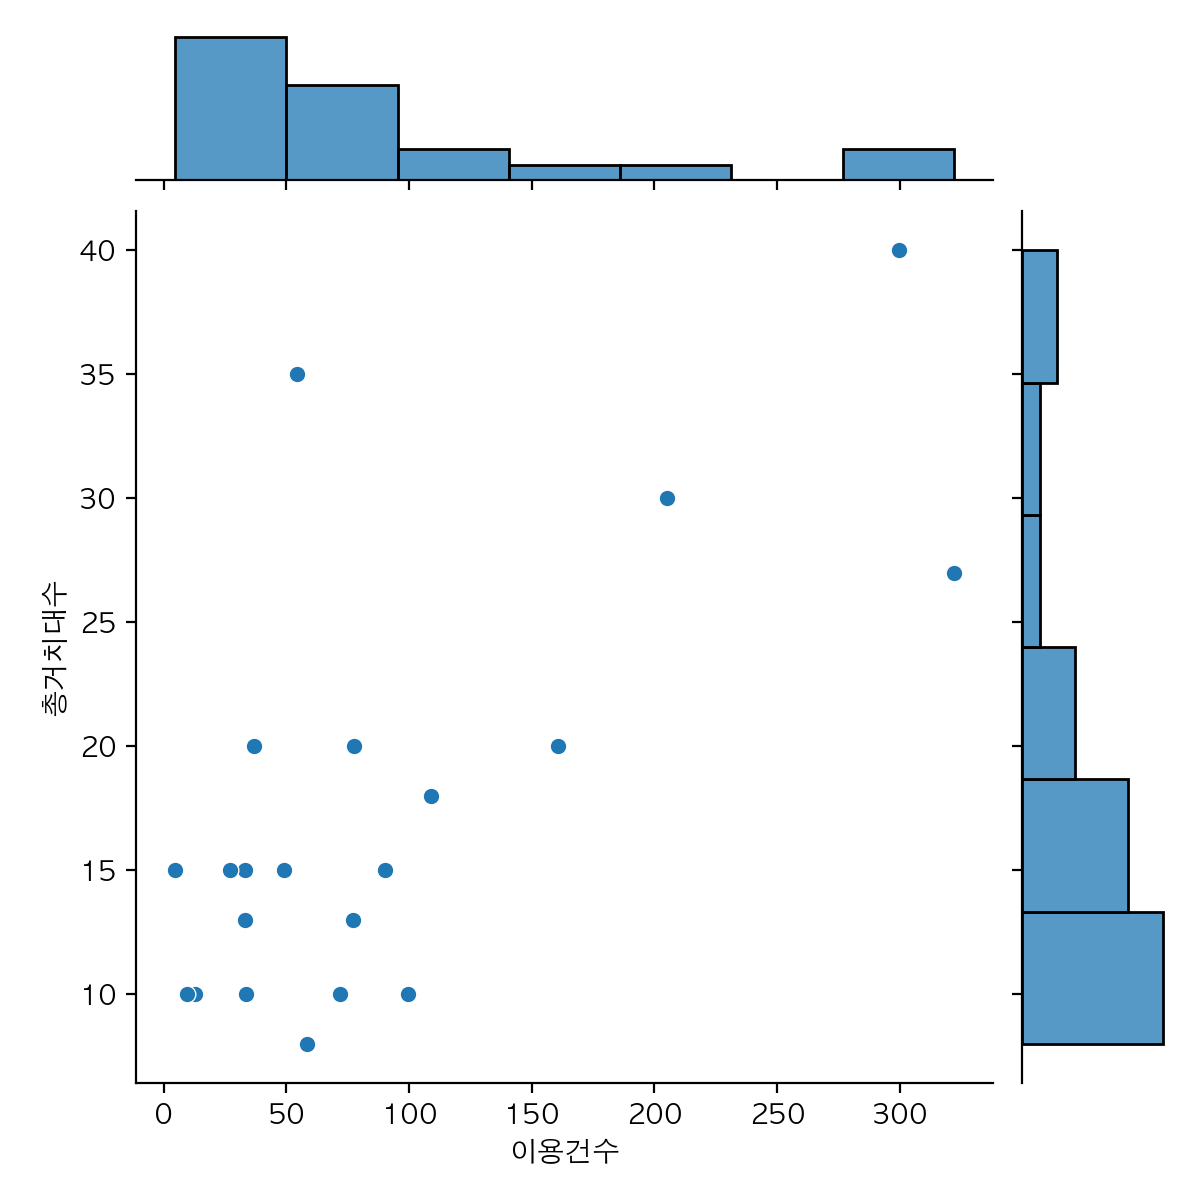

In [85]:
joint = sns.jointplot(x='이용건수',y='총거치대수',data=bic_merge)

<IPython.core.display.Javascript object>


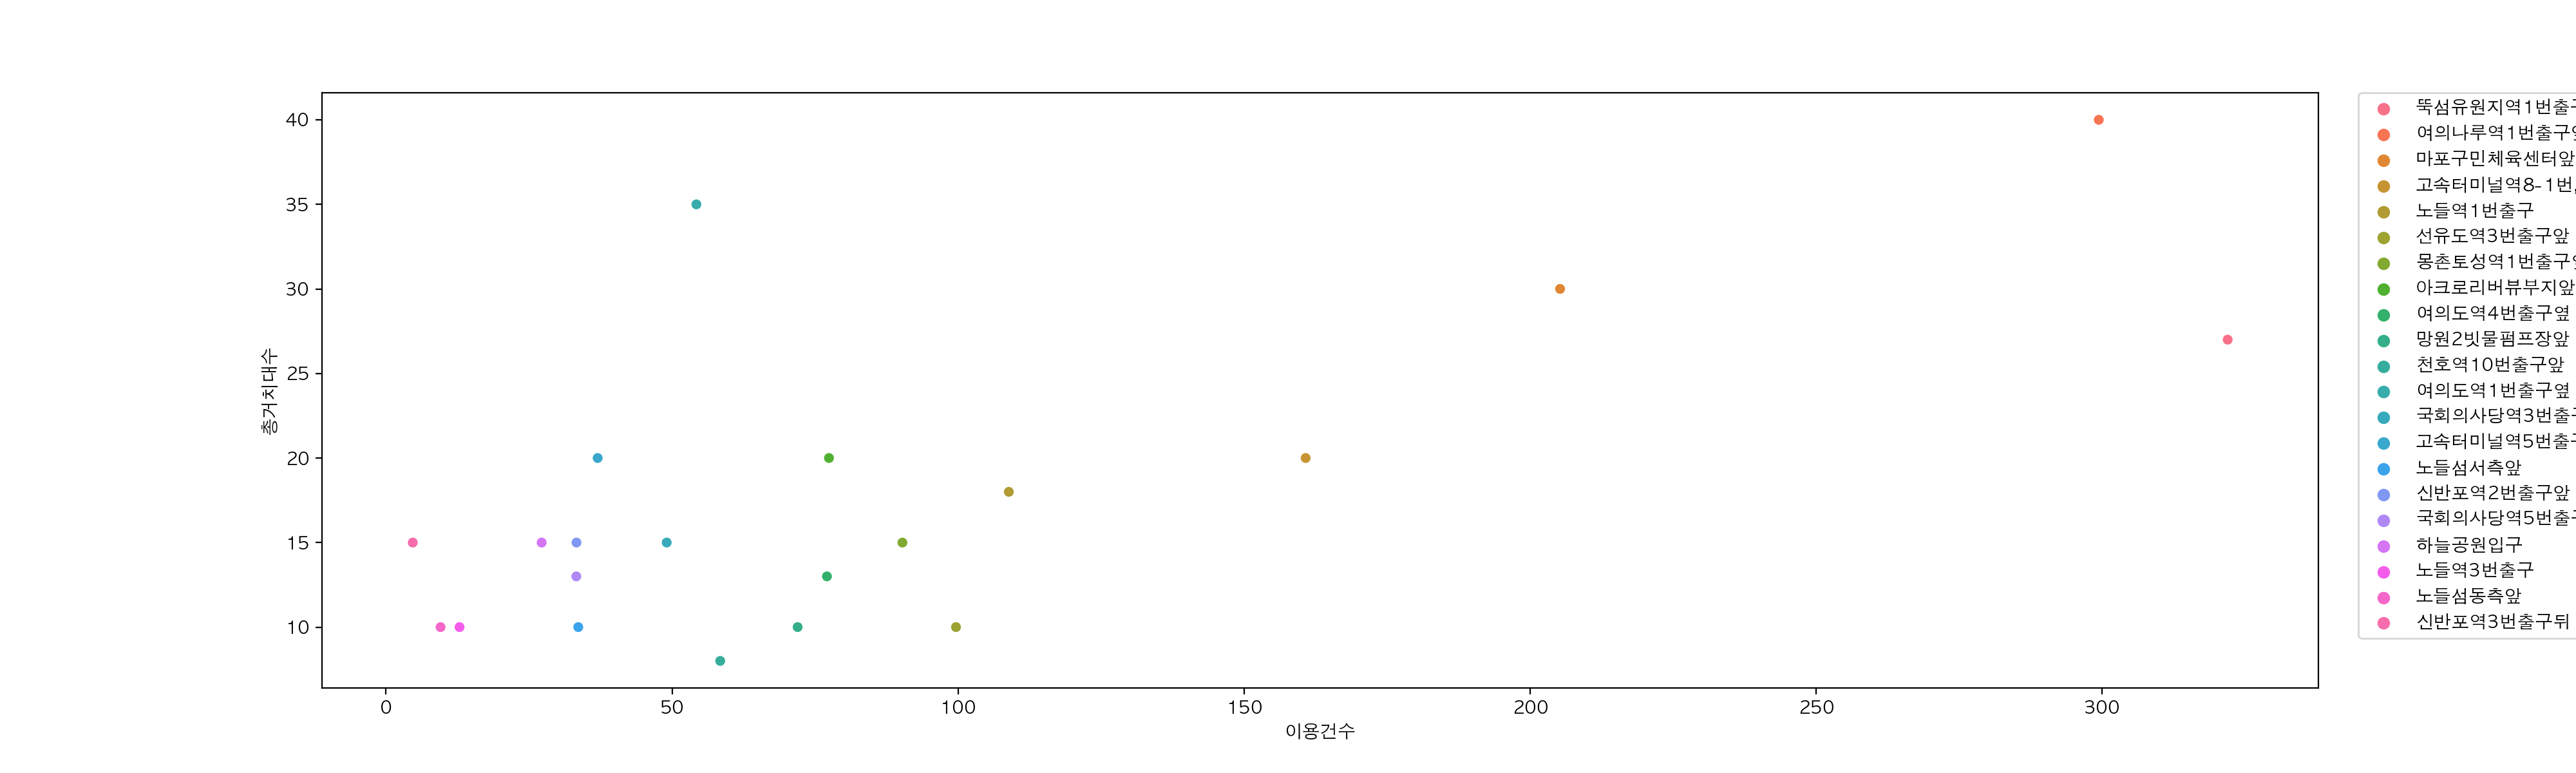

In [112]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='이용건수',y='총거치대수',hue='대여소명',data=bic_merge)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [51]:
df_hanriver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505232 entries, 0 to 505231
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    505232 non-null  object 
 1   년       505232 non-null  int64  
 2   월       505232 non-null  int64  
 3   일       505232 non-null  int64  
 4   대여시간    505232 non-null  int64  
 5   대여소번호   505232 non-null  int64  
 6   대여소명    505232 non-null  object 
 7   대여구분코드  505232 non-null  object 
 8   연령대코드   505232 non-null  object 
 9   이용건수    505232 non-null  int64  
 10  운동량     505232 non-null  object 
 11  탄소량     505232 non-null  object 
 12  이동거리    505232 non-null  float64
 13  사용시간    505232 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 54.0+ MB


In [56]:
df_hanriver['요일']= df_hanriver['대여일자'].dt.dayofweek
df_hanriver

,대여일자,년,월,일,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,요일
0,2019-12-01,2019,12,1,0,2219,"고속터미널역 8-1번, 8-2번 출구 사이",정기권,~10대,1,200.34,1.73,7440.00,47,6
1,2019-12-01,2019,12,1,0,1268,몽촌토성역 1번출구 옆,정기권,20대,1,39.47,0.41,1780.00,16,6
2,2019-12-01,2019,12,1,0,1009,천호역4번출구(현대백화점),정기권,20대,2,347.37,2.39,10320.00,61,6
3,2019-12-01,2019,12,1,0,204,국회의사당역 5번출구 옆,정기권,20대,1,110.42,1.00,4290.00,19,6
4,2019-12-01,2019,12,1,0,207,여의나루역 1번출구 앞,정기권,20대,1,0.00,0.00,0.00,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505227,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,~10대,1,0.00,0.00,0.00,43,6
505228,2021-01-31,2021,1,31,23,152,마포구민체육센터 앞,일일권,20대,1,114.94,1.50,6450.00,43,6
505229,2021-01-31,2021,1,31,23,4619,한강트럼프월드3차 앞,일일권,20대,2,282.84,4.11,17707.58,138,6
505230,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,30대,1,250.30,1.61,6945.89,38,6


<IPython.core.display.Javascript object>


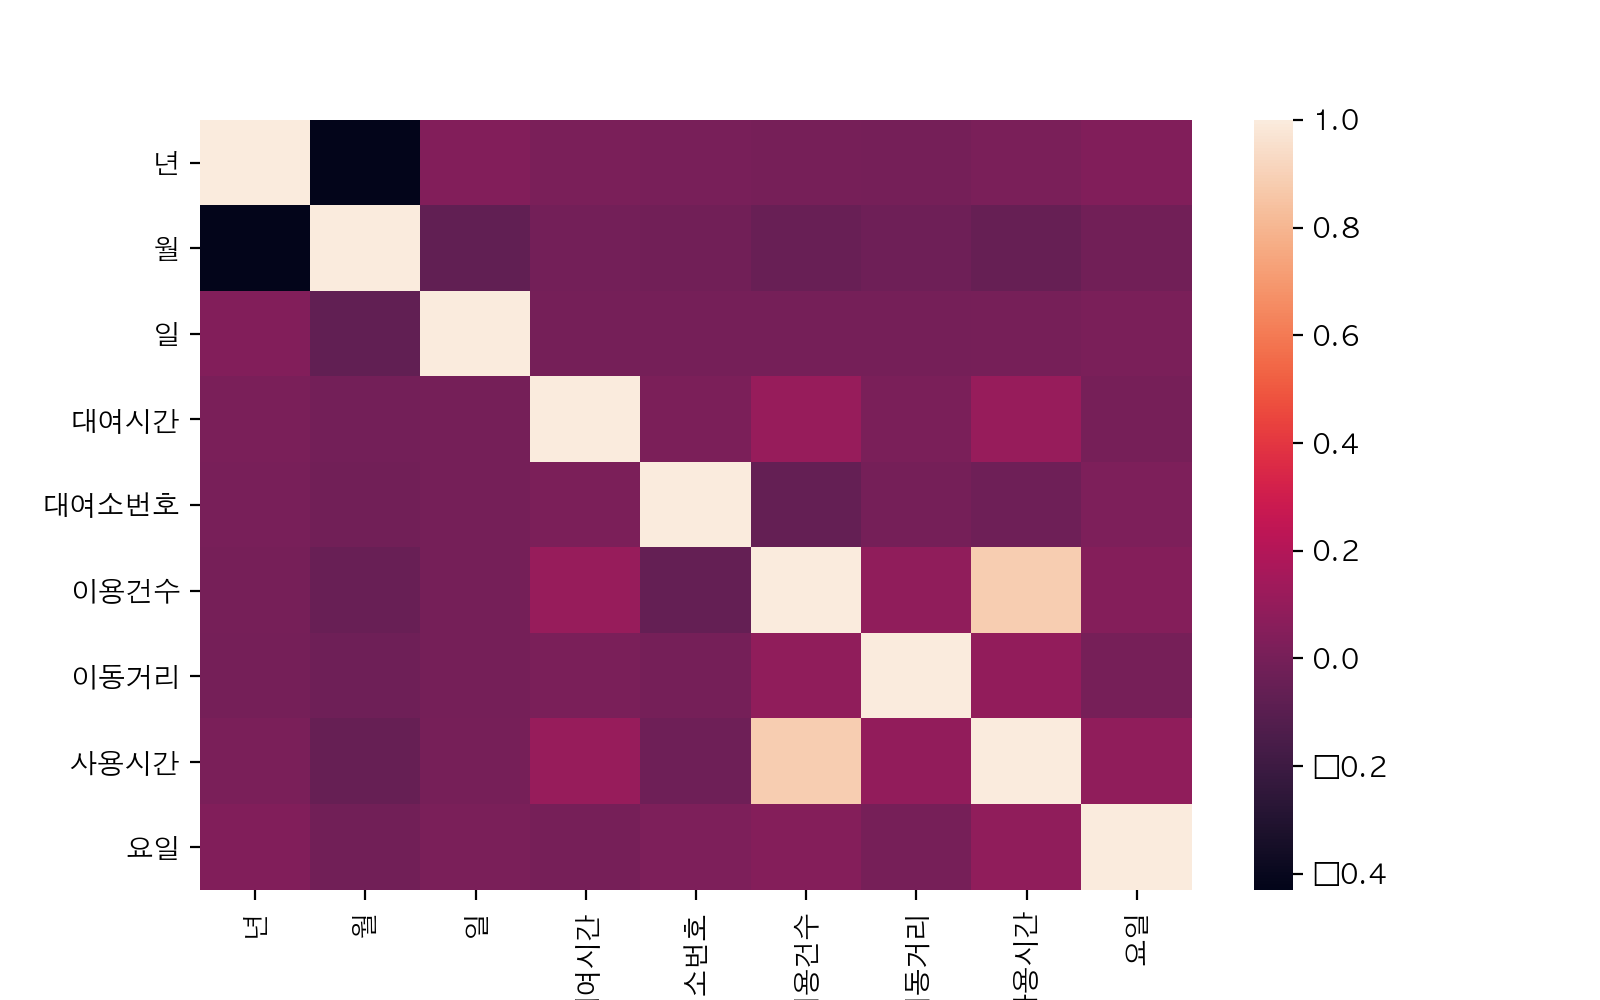

<AxesSubplot:>

In [74]:
plt.figure(figsize=(8,5))
sns.heatmap(df_hanriver.corr())

In [62]:
df_hanriver.corr()

,년,월,일,대여시간,대여소번호,이용건수,이동거리,사용시간,요일
년,1.000000,-0.430295,0.039406,0.015995,0.006559,0.002895,-0.000435,0.014875,0.034863
월,-0.430295,1.000000,-0.068886,-0.010623,-0.014300,-0.046018,-0.024117,-0.054109,-0.014812
일,0.039406,-0.068886,1.000000,-0.000823,-0.000682,-0.001513,-0.003801,0.000990,0.012906
대여시간,0.015995,-0.010623,-0.000823,1.000000,0.021406,0.110846,0.011164,0.108758,0.003309
대여소번호,0.006559,-0.014300,-0.000682,0.021406,1.000000,-0.061187,-0.001200,-0.023445,0.023436
이용건수,0.002895,-0.046018,-0.001513,0.110846,-0.061187,1.000000,0.088142,0.885189,0.045469
이동거리,-0.000435,-0.024117,-0.003801,0.011164,-0.001200,0.088142,1.000000,0.089997,0.004295
사용시간,0.014875,-0.054109,0.000990,0.108758,-0.023445,0.885189,0.089997,1.000000,0.085593
요일,0.034863,-0.014812,0.012906,0.003309,0.023436,0.045469,0.004295,0.085593,1.000000


In [64]:
df_hanriver['요일']= df_hanriver['대여일자'].dt.dayofweek
df_hanriver

,대여일자,년,월,일,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,요일
0,2019-12-01,2019,12,1,0,2219,"고속터미널역 8-1번, 8-2번 출구 사이",정기권,~10대,1,200.34,1.73,7440.00,47,6
1,2019-12-01,2019,12,1,0,1268,몽촌토성역 1번출구 옆,정기권,20대,1,39.47,0.41,1780.00,16,6
2,2019-12-01,2019,12,1,0,1009,천호역4번출구(현대백화점),정기권,20대,2,347.37,2.39,10320.00,61,6
3,2019-12-01,2019,12,1,0,204,국회의사당역 5번출구 옆,정기권,20대,1,110.42,1.00,4290.00,19,6
4,2019-12-01,2019,12,1,0,207,여의나루역 1번출구 앞,정기권,20대,1,0.00,0.00,0.00,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505227,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,~10대,1,0.00,0.00,0.00,43,6
505228,2021-01-31,2021,1,31,23,152,마포구민체육센터 앞,일일권,20대,1,114.94,1.50,6450.00,43,6
505229,2021-01-31,2021,1,31,23,4619,한강트럼프월드3차 앞,일일권,20대,2,282.84,4.11,17707.58,138,6
505230,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,30대,1,250.30,1.61,6945.89,38,6


In [68]:
df_new2 = df_hanriver.loc[:,['요일','이용건수']]
df_new2

,요일,이용건수
0,6,1
1,6,1
2,6,2
3,6,1
4,6,1
...,...,...
505227,6,1
505228,6,1
505229,6,2
505230,6,1


In [70]:
df_new3 = df_new2.groupby('요일',as_index=False).sum()
df_new3

,요일,이용건수
0,0,108487
1,1,108785
2,2,107303
3,3,112313
4,4,117411
5,5,144315
6,6,143005


<IPython.core.display.Javascript object>


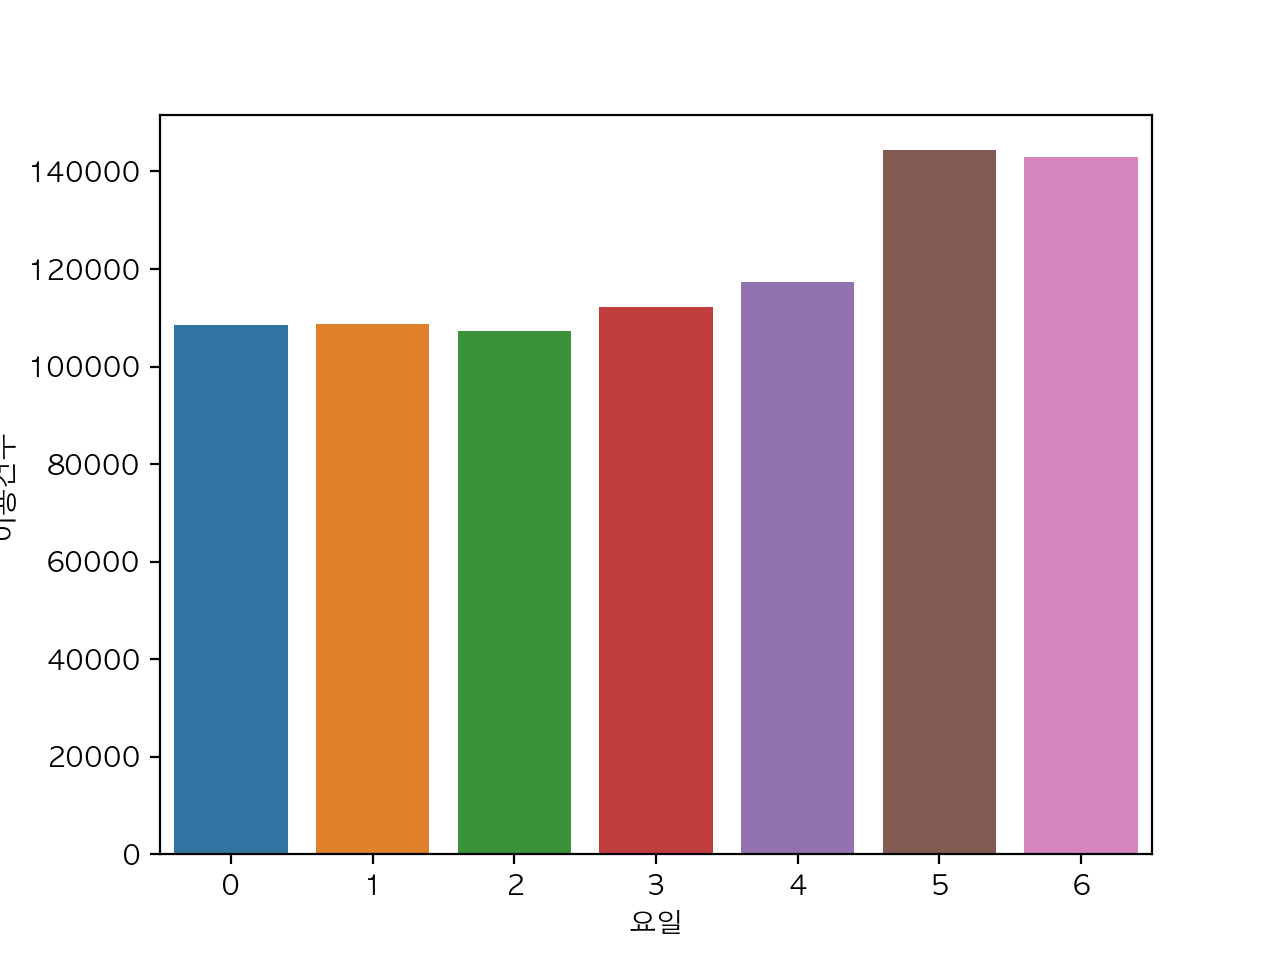

<AxesSubplot:xlabel='요일', ylabel='이용건수'>

In [72]:
sns.barplot(x='요일',y='이용건수',data=df_new3)